# Udacity Data Scientist Nanodegree - Project 1

## Analyzing Stack Overflow Survey Data

In this project I were using Stack Overflow Survey Data 2017. There are three questions I’m going to answer. Explanation and visualization will be presented in order to answer each question.

## Questions

1- How to start learning programming with no formal technical education?

2- Is it worth to learn programming and start working as developer?

3- Does the companies trust in developers with no formal technical education?

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap

data = pd.read_csv('/Users/lujainz/Desktop/JupyterNotes/survey-results-public.csv')


In [2]:
# Filter the data so it only contains the survey result by the developer
df = data[data['Professional'] == 'Professional developer']


# Take only the needed columns 
df = df[["Respondent","MajorUndergrad","EmploymentStatus","FormalEducation","CompanyType","CareerSatisfaction","JobSeekingStatus","EducationImportant", "EducationTypes", "SelfTaughtTypes", "Salary", "DeveloperType"]]
 

# Fill the N/A values in CompanyType column with the mode
df['CompanyType'] = df['CompanyType'].fillna(df['CompanyType'].mode()[0])

# Fill the N/A values in EducationImportant column with the mode
df['EducationImportant'] = df['EducationImportant'].fillna(df['EducationImportant'].mode()[0])

# Fill the N/A values in CareerSatisfaction column with the mean
df['CareerSatisfaction'].fillna((df['CareerSatisfaction'].mean()), inplace=True)


df.isna().sum()


Respondent                0
MajorUndergrad         3173
EmploymentStatus          0
FormalEducation           0
CompanyType               0
CareerSatisfaction        0
JobSeekingStatus      12103
EducationImportant        0
EducationTypes        13724
SelfTaughtTypes       16113
Salary                23240
DeveloperType             9
dtype: int64

### Data Exploration

 1- Methods to learn programming 

In [3]:
# Create a new columns to flag each Developer if their major is related or not
def check_major(value):
    '''
    input: the value of each row in the selected column
    output: the mapped value based on the rule I made in this function
    '''

    if value == 'A non-computer-focused engineering discipline' \
    or value == 'Computer engineering or electrical/electronics engineering' \
    or value == 'Mathematics or statistics' \
    or value == 'A humanities discipline' \
    or value == 'A business disciplineg' \
    or value == 'Fine arts or performing arts' \
    or value == 'I never declared a major' \
    or value == 'A social science' \
    or value == 'Psychologyr' \
    or value == 'Something else' \
    or value == 'A health science' \
    or value == 'A natural science':
        return 'Not IT Related'
    return 'IT Related'

df['Major'] = df['MajorUndergrad'].apply(check_major)


In [4]:
# Take the devlopers with no IT Major
Developers_df = df[df['Major'] == 'Not IT Related']

#Store how they learn programming
methods = Developers_df['EducationTypes'].value_counts().reset_index()


In [5]:
# Clean the Methods 

# Function that Returns a new data frame of method of learn and its count 
def total_count (df, col1, col2, look_for, colName):
    from collections import defaultdict
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])             
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values(colName, ascending=False, inplace=True)
    return new_df

# the possible values of how to learn programming
Possible_values = ["Self-taught", "On-the-job training", "Online course", "Open source contributions", 
                  "Hackathon", "Coding competition", "Industry certification", "Part-time/evening course", "Bootcamp"]


methods_df = total_count(methods, 'index', 'EducationTypes', Possible_values, 'EducationTypes')

Text(0, 0.5, 'Number of develovers')

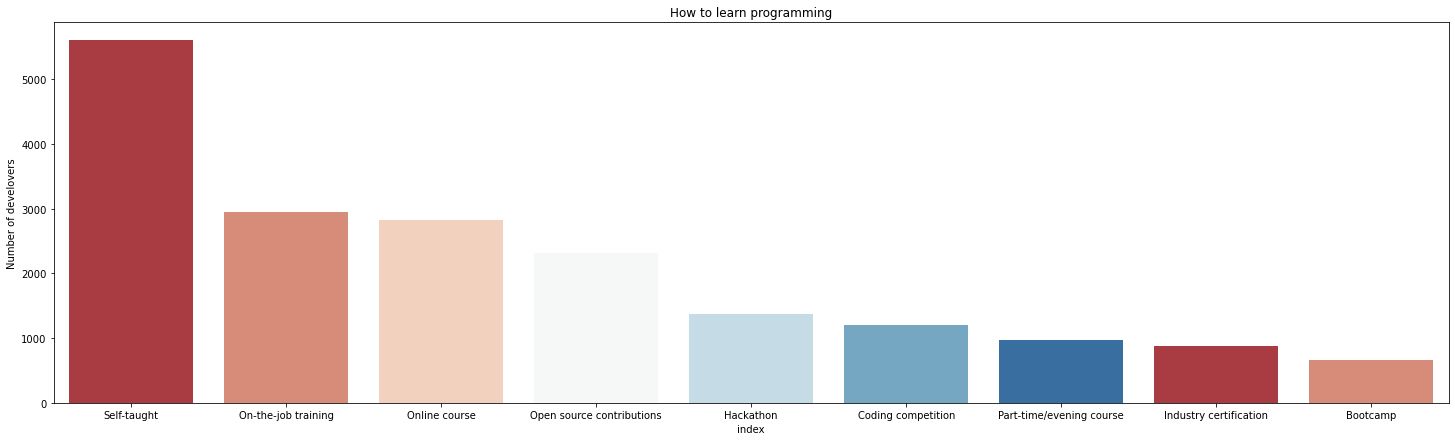

In [6]:
# Visualize the data
plt.figure(figsize=(25, 7))
sns.barplot(data=methods_df, x='index', y='EducationTypes', palette=sns.color_palette("RdBu", n_colors=7))
plt.title('How to learn programming')
plt.ylabel('Number of develovers')

As shown most of the developers start learning how to programming by themselves, let Know how they teach themselves 

In [7]:
# Create a new columns to flag each Developer if he/she self learning type or not
def check_Type(value):
    '''
    input: the value of each row in the selected column
    output: the mapped value based on the rule I made in this function
    '''

    if value == 'Self-taught':
        return 'Self taught'
    return 'Not Self-taught'

Developers_df['Type'] = Developers_df['EducationTypes'].apply(check_Type)
Developers_df.shape


(9490, 14)

In [8]:
# Take only self learning devlopers type to avoid null values in the Other type
Self_Taught_df = Developers_df.loc[Developers_df['Type'].str.contains("Self-taught", case=False)]


# Fill the N/A values in SelfTaughtTypes column with the mode
Self_Taught_df['SelfTaughtTypes'] = Self_Taught_df['SelfTaughtTypes'].fillna(Self_Taught_df['SelfTaughtTypes'].mode()[0])

#Store how they teach themselves
Selt_learning_methods = Developers_df['SelfTaughtTypes'].value_counts().reset_index()


In [9]:
# Clean the self learning methods 

# the possible values of self learning methods 
possible_Values = ["Official documentation", "Stack Overflow Q&A", "Trade book", "Non-Stack online communities", 
                  "Built-in help", "Stack Overflow Docs", "Friends network", "Textbook", "Company internal community", 
                  "Other", "Tutoring/mentoring"]

Self_learning_df = total_count(Selt_learning_methods, 'index', 'SelfTaughtTypes', possible_Values, 'SelfTaughtTypes')

Text(0.5, 0, 'Recourses')

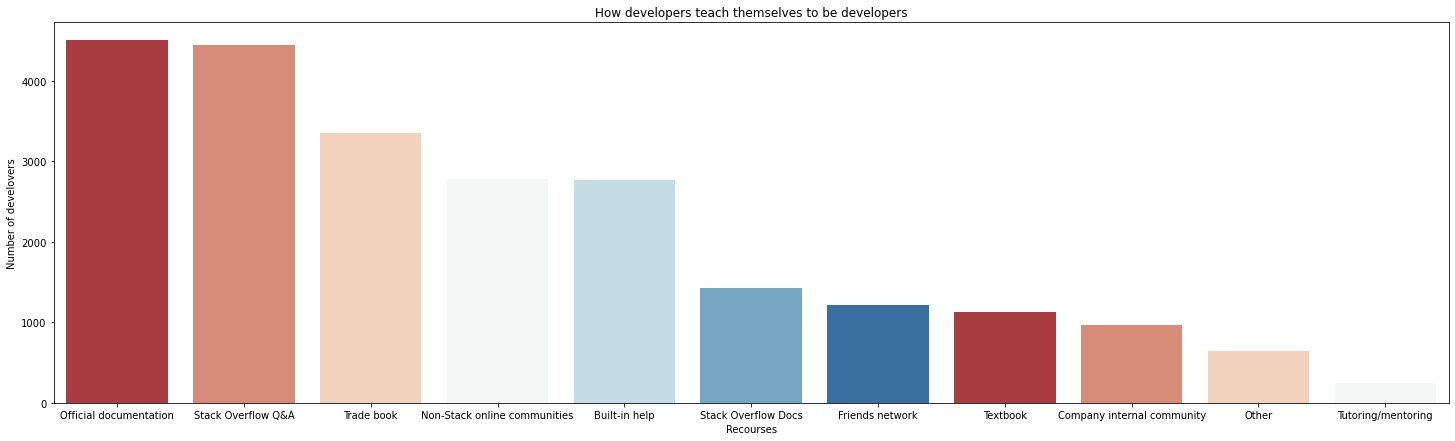

In [10]:
# Visualize the data
plt.figure(figsize=(25, 7))
sns.barplot(data=Self_learning_df, x='index', y='SelfTaughtTypes', palette=sns.color_palette("RdBu", n_colors=7))
plt.title('How developers teach themselves to be developers')
plt.ylabel('Number of develovers')
plt.xlabel('Recourses')

 2- Career satisfaction and is it worthwhile to be a developer with no technical education

In [11]:
# grouped the data so I know how many developer in each major
aggregated_data = df.groupby(['Major','CareerSatisfaction'], as_index=False)['Respondent'].count()

# Add column percentage
total_respondents_per_major = df['Major'].value_counts()

aggregated_data['Respondent Percentage'] = aggregated_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_major[x['Major']], axis=1) \
                                           .round(4)
aggregated_data = aggregated_data[['Major', 'CareerSatisfaction', 'Respondent Percentage']]
developers_satisfaction = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Major', columns='CareerSatisfaction')

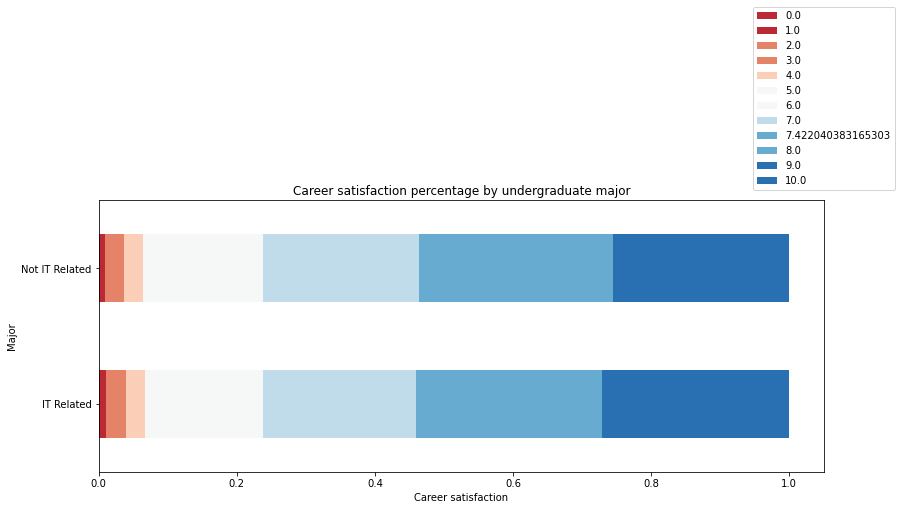

In [12]:
# Visualize the data
developers_satisfaction.plot(kind='barh', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("RdBu", n_colors=7)),
                  figsize=(13,5))
plt.legend(loc="lower center", bbox_to_anchor=(1,1.02))
plt.xlabel('Career satisfaction')
plt.title('Career satisfaction percentage by undergraduate major')
plt.show()

3- Non technical developers employment statu 

<AxesSubplot:title={'center':'Developers employment statu'}, xlabel='Employment Status', ylabel='Percentage'>

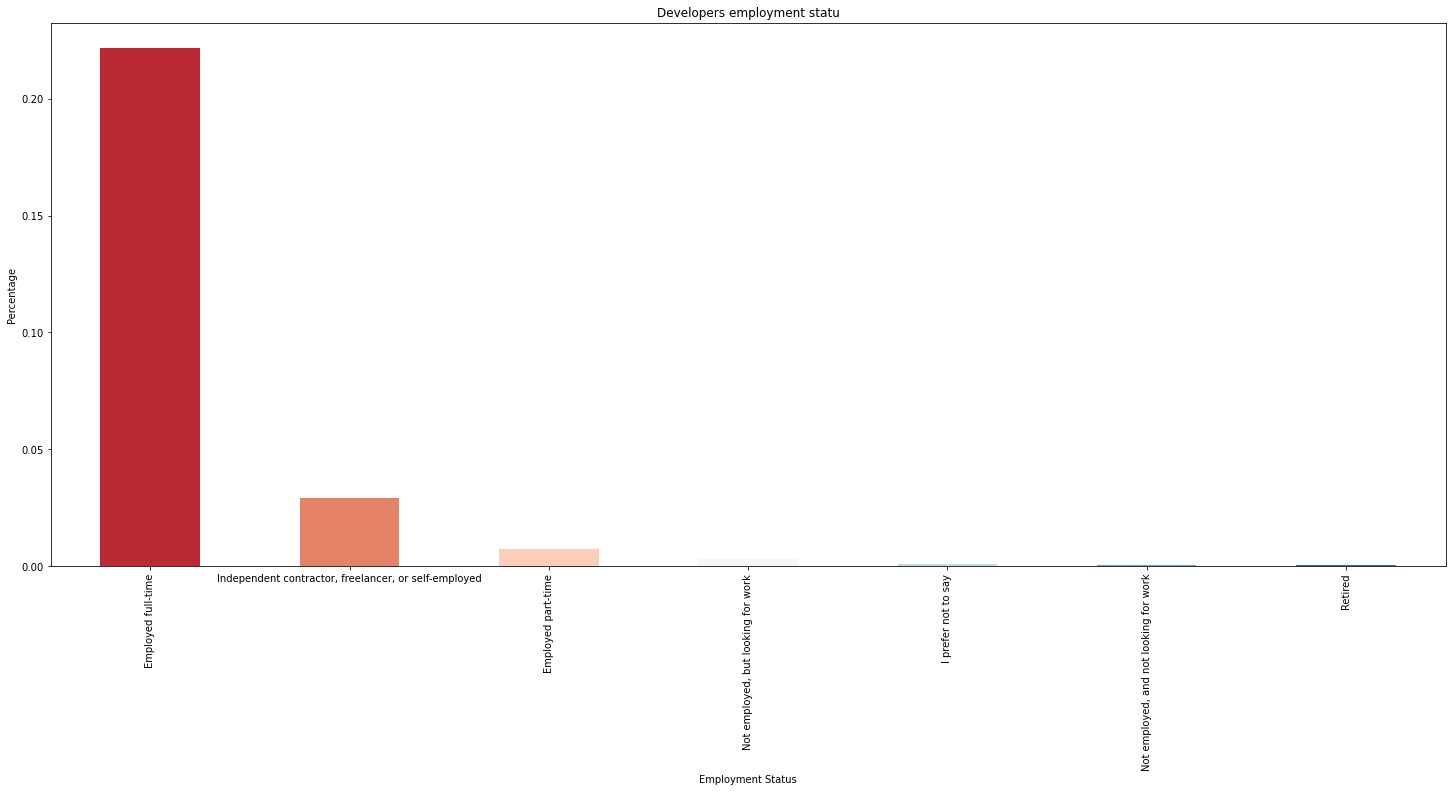

In [13]:
#Get the values of Employment Status 
count_vals = Developers_df.EmploymentStatus.value_counts()
# Visualize the data
plt.figure(figsize=(25, 10))
plt.title('Developers employment statu')
plt.xlabel("Employment Status")
plt.ylabel('Percentage')
sns.barplot(palette=sns.color_palette("RdBu", n_colors=7))
(count_vals/df.shape[0]).plot(kind="bar", color=sns.color_palette("RdBu", n_colors=7))


<AxesSubplot:title={'center':'Not IT related relevelopers company type'}, xlabel='Company Type', ylabel='Percentage'>

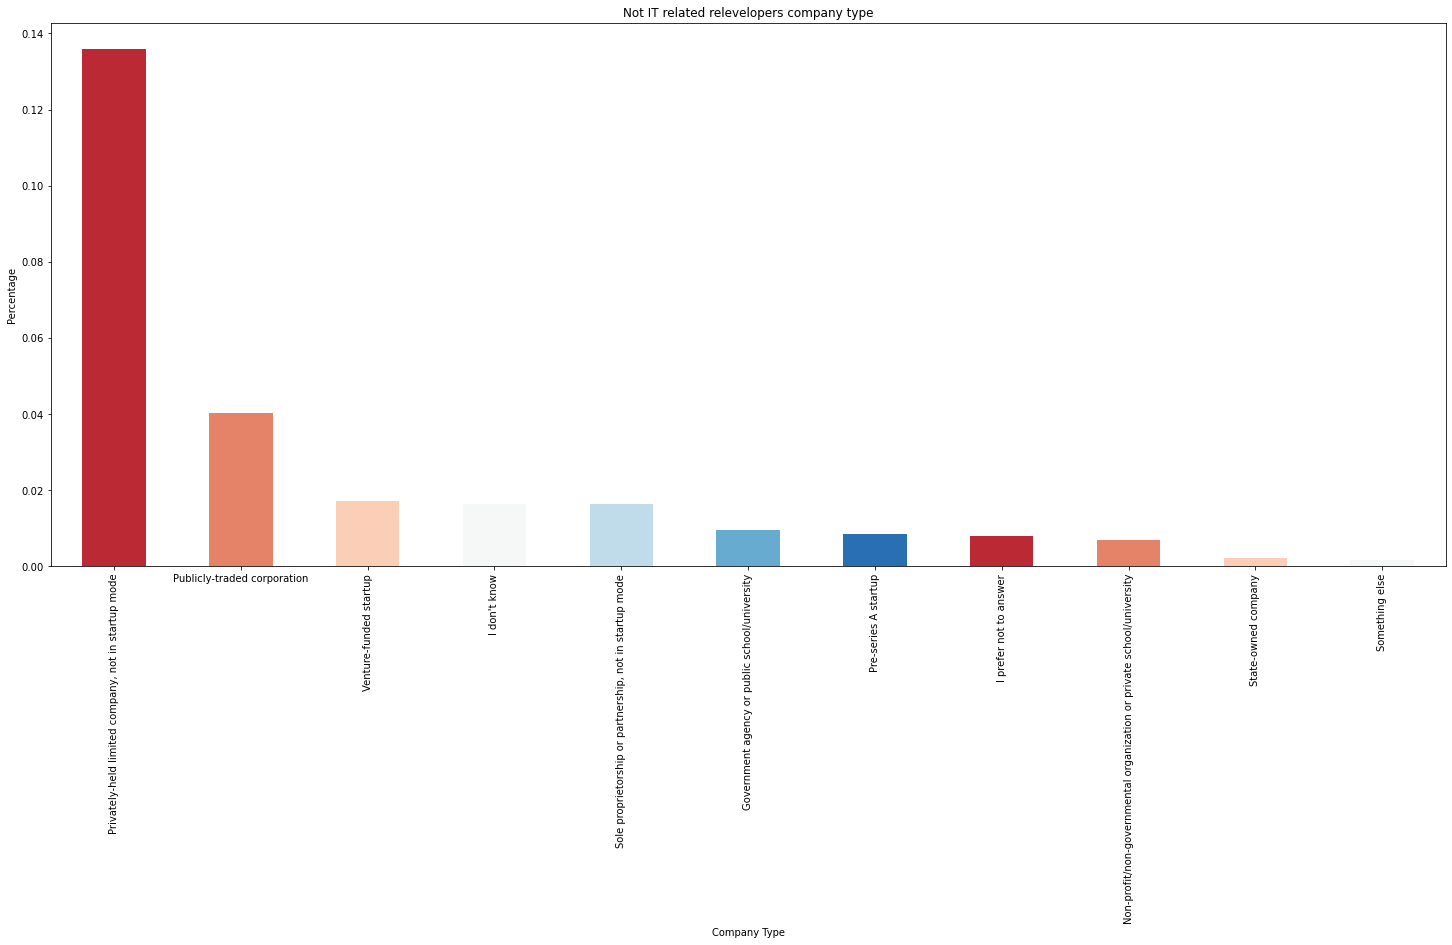

In [14]:
#Get the values of Company Type
CompanyType_count_vals = Developers_df.CompanyType.value_counts()
# Visualize the data
plt.figure(figsize=(25, 10))
plt.title('Not IT related relevelopers company type')
plt.xlabel('Company Type')
plt.ylabel('Percentage')
sns.barplot(palette=sns.color_palette("RdBu", n_colors=7))
(CompanyType_count_vals/df.shape[0]).plot(kind="bar", color=sns.color_palette("RdBu", n_colors=7))

<AxesSubplot:title={'center':'Not IT related relevelopers company type'}, xlabel='Company Type', ylabel='Percentage'>

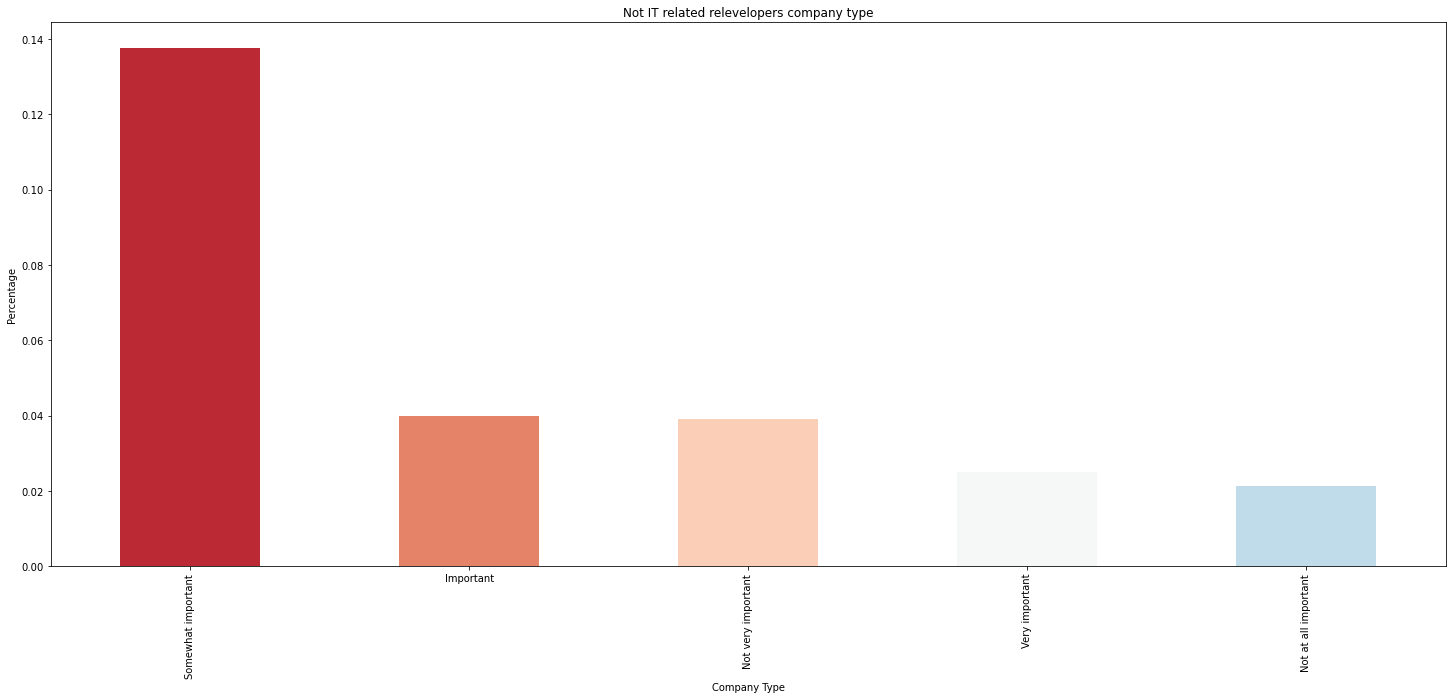

In [16]:
#Get the values of Education Important 
EducationImportant_count_vals = Developers_df.EducationImportant.value_counts()
# Visualize the data
plt.figure(figsize=(25, 10))
plt.title('Not IT related relevelopers company type')
plt.xlabel('Company Type')
plt.ylabel('Percentage')
sns.barplot(palette=sns.color_palette("RdBu", n_colors=7))
(EducationImportant_count_vals/df.shape[0]).plot(kind="bar", color=sns.color_palette("RdBu", n_colors=7))